# Analyse results

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In /home/paul/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/paul/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/paul/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/paul/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/paul/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_c

## Change convolutional layers size 

In [40]:
results = pd.read_csv('results.csv')
results

,img_nbr,L,B,max_PSNR,max_SSIM,Time,S
0,1,4,10,38.980190,0.955367,739.842032,10.0
1,1,16,10,44.042828,0.984468,765.586002,10.0
2,1,32,10,45.318363,0.988103,874.603965,10.0
3,2,4,10,47.281616,0.991196,761.644711,10.0
4,2,16,10,51.178650,0.997035,837.614169,10.0
5,2,32,10,50.308037,0.996534,880.493332,10.0
6,3,4,10,39.943176,0.961649,744.282285,10.0
7,3,16,10,43.270878,0.982053,783.602700,10.0
8,3,32,10,46.033264,0.991047,879.216456,10.0
9,4,4,10,43.400162,0.980503,756.610043,10.0


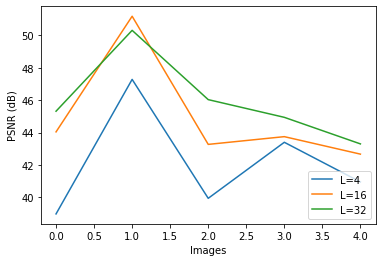

In [27]:
l4 = results.loc[results['L'] == 4].max_PSNR.values 
l16 = results.loc[results['L'] == 16].max_PSNR.values 
l32 = results.loc[results['L'] == 32].max_PSNR.values  

plt.plot(l4, label='L=4')
plt.plot(l16, label='L=16')
plt.plot(l32, label='L=32')
plt.legend(loc='lower right')
plt.xlabel("Images")
plt.ylabel("PSNR (dB)")
plt.show()


## Ratio max_PSNR/time 

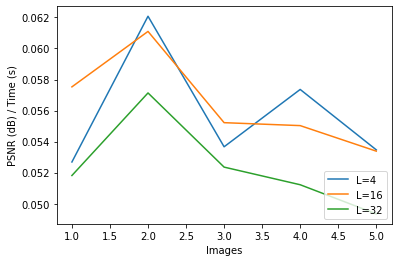

In [41]:
l4 = results.loc[results['L'] == 4].max_PSNR.div(other=results.loc[results['L'] == 4].Time)
l16 = results.loc[results['L'] == 16].max_PSNR.div(other=results.loc[results['L'] == 16].Time, axis=0)
l32 = results.loc[results['L'] == 32].max_PSNR.div(other=results.loc[results['L'] == 32].Time, axis=0)
images = np.arange(1, 6)
plt.plot(images, l4, label='L=4')
plt.plot(images, l16, label='L=16')
plt.plot(images, l32, label='L=32')
plt.legend(loc='lower right')
plt.xlabel("Images")
plt.ylabel("PSNR (dB) / Time (s)")
plt.show()

## L value influence

### PSNR

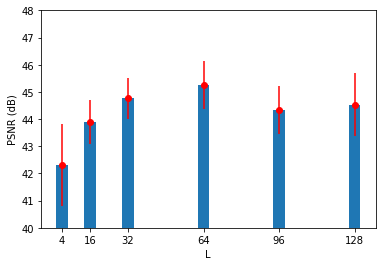

In [80]:
l_res = pd.read_csv('L_results2.csv')
tri_mean = l_res.groupby(['L'])['max_PSNR'].mean().reset_index()
tri_std = l_res.groupby(['L'])['max_PSNR'].std().reset_index()
tri = pd.merge(tri_mean, tri_std, on=['L'], suffixes=('_mean', '_std'))

plt.bar(tri['L'], tri['max_PSNR_mean'], width=5)
plt.ylim(40, 48)
plt.errorbar(tri['L'], tri['max_PSNR_mean'], yerr=tri['max_PSNR_std'], linestyle='None', fmt='o', color='red')
plt.xlabel("L")
plt.xticks([4, 16, 32, 64, 96, 128])
plt.ylabel("PSNR (dB)") 
plt.show()

### SSIM

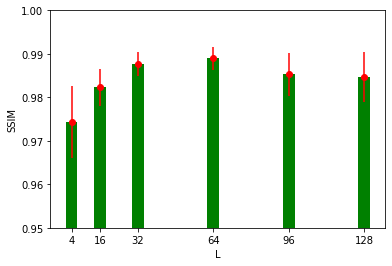

In [64]:
l_res = pd.read_csv('L_results2.csv')
tri_mean = l_res.groupby(['L'])['max_SSIM'].mean().reset_index()
tri_std = l_res.groupby(['L'])['max_SSIM'].std().reset_index()
tri = pd.merge(tri_mean, tri_std, on=['L'], suffixes=('_mean', '_std'))

plt.bar(tri['L'], tri['max_SSIM_mean'], width=5, color='green')
plt.ylim(0.95, 1)
plt.errorbar(tri['L'], tri['max_SSIM_mean'], yerr=tri['max_SSIM_std'], linestyle='None', fmt='o', color='red')
plt.xlabel("L")
plt.xticks([4, 16, 32, 64, 96, 128])
plt.ylabel("SSIM") 
plt.show()

### Time

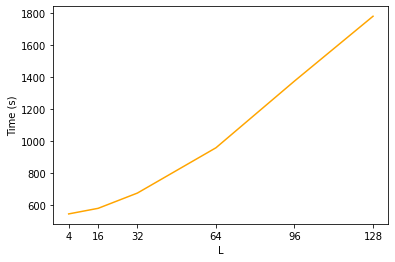

In [40]:
time_mean = l_res.groupby(['L'])['Time'].mean().reset_index()
plt.plot(tri['L'], time_mean['Time'], color='orange', label='time (s)')
plt.ylabel("Time (s)")
plt.xlabel("L")
plt.xticks([4, 16, 32, 64, 96, 128])
plt.show()

## Batch analysis

### S = 10

In [4]:
from matplotlib import rc

fs = 50 # font size 
plt.rcParams.update({'font.size': fs})
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.style.use('seaborn')
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)

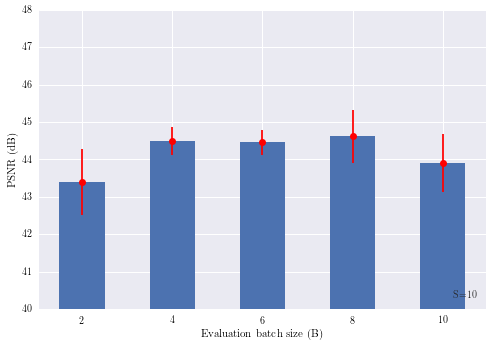

In [46]:
b_res = pd.read_csv('results/results_batch1.csv')
tri_mean = b_res.groupby(['S', 'B'])['max_PSNR'].mean().reset_index()
tri_std = b_res.groupby(['S', 'B'])['max_PSNR'].std().reset_index()
tri = pd.merge(tri_mean, tri_std, on=['S', 'B'], suffixes=('_mean', '_std'))
tri10 = tri.loc[tri['S'] == 10]


plt.bar(tri10['B'], tri10['max_PSNR_mean'], width=1, label='S=10')
plt.errorbar(tri10['B'], tri10['max_PSNR_mean'], yerr=tri10['max_PSNR_std'], color='red', fmt='o')
plt.legend(loc='lower right')
plt.ylim(40, 48)
plt.xlabel("Evaluation batch size (B)")
plt.ylabel("PSNR (dB)")
plt.show()

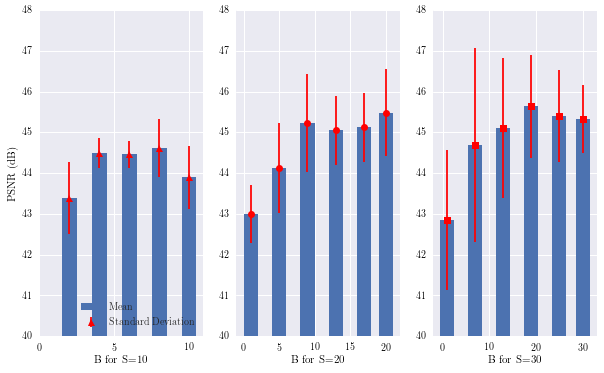

In [47]:
b_res = pd.read_csv('results/results_batches3.csv')
tri_mean = b_res.groupby(['S', 'B'])['max_PSNR'].mean().reset_index()
tri_std = b_res.groupby(['S', 'B'])['max_PSNR'].std().reset_index()
tri = pd.merge(tri_mean, tri_std, on=['S', 'B'], suffixes=('_mean', '_std'))
tri20 = tri.loc[tri['S'] == 20]
tri30 = tri.loc[tri['S'] == 30]

fig = plt.figure(figsize=(10, 6)) 
plt.subplot(1,3,1), plt.bar(tri10['B'], tri10['max_PSNR_mean'], width=1, label='Mean'), 
plt.errorbar(tri10['B'], tri10['max_PSNR_mean'], yerr=tri10['max_PSNR_std'], color='red', label='Standard Deviation', fmt='^')
plt.legend(loc='lower right')
plt.ylim(40, 48)
plt.xticks([0, 5, 10])
plt.xlabel("B for S=10")
plt.ylabel("PSNR (dB)")
plt.subplot(1,3,2), plt.bar(tri20['B'], tri20['max_PSNR_mean'], width=2), 
plt.errorbar(tri20['B'], tri20['max_PSNR_mean'], yerr=tri20['max_PSNR_std'], color='red', fmt='o')
plt.ylim(40, 48)
plt.xlabel("B for S=20")
plt.subplot(1,3,3), plt.bar(tri30['B'], tri30['max_PSNR_mean'], width=3), 
plt.errorbar(tri30['B'], tri30['max_PSNR_mean'], yerr=tri30['max_PSNR_std'], color='red', fmt='s')
plt.ylim(40, 48)
plt.xticks([0, 10, 20, 30])
plt.xlabel("B for S=30")
plt.show()

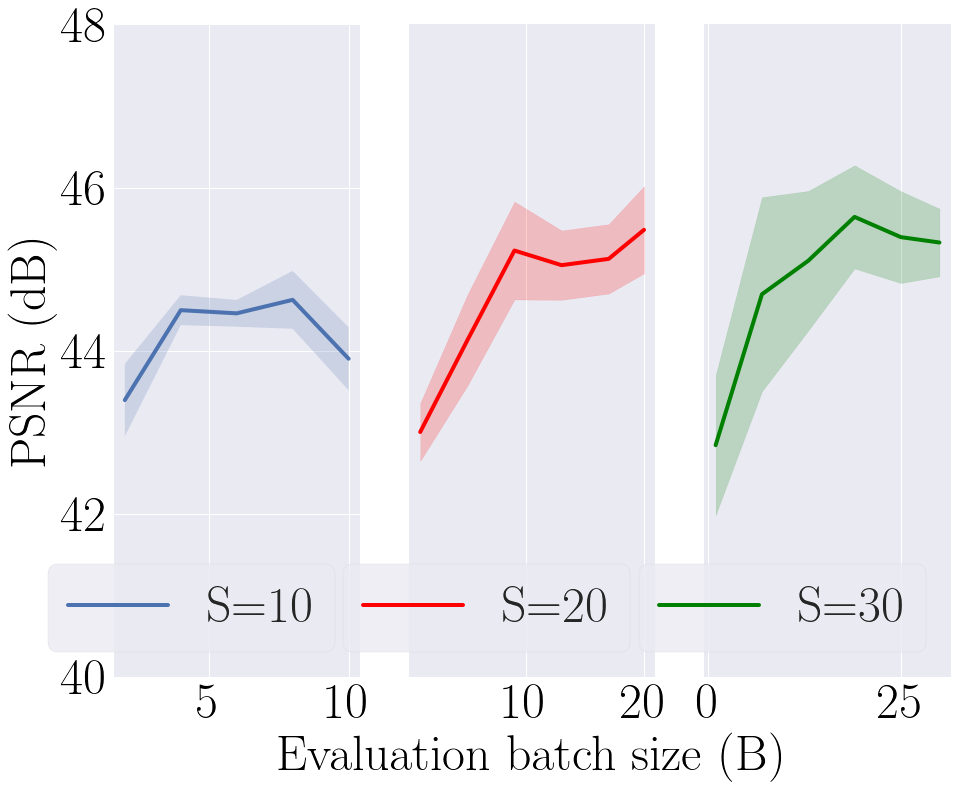

In [49]:
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

#ax1.bar(tri10['B'], tri10['max_PSNR_mean'], width=1, label='S=10')
#ax1.errorbar(tri10['B'], tri10['max_PSNR_mean'], yerr=tri10['max_PSNR_std'], color='red', fmt='o')
ax1.set_ylim(40, 48)
ax1.set_ylabel("PSNR (dB)", fontsize=fs)
ax1.tick_params(axis='x',labelsize=fs)
ax1.tick_params(axis='y',labelsize=fs)
ax1.plot(tri10['B'],tri10['max_PSNR_mean'],linewidth=4,label='S=10')
ax1.legend(loc='lower right', fontsize=fs, frameon=True)
l1 = ( tri10['max_PSNR_mean']-tri10['max_PSNR_std']/2)
l2 = (tri10['max_PSNR_mean']+tri10['max_PSNR_std']/2)
ax1.fill_between(tri10['B'], l1, l2,alpha=0.2)
#ax1.ylim(40, 48)
#ax1.xlabel("Evaluation batch size (B)", fontsize=fs)
#ax1.ylabel("PSNR (dB)", fontsize=fs)

#ax2.bar(tri20['B'], tri20['max_PSNR_mean'], width=2, label='S=20')
ax2.plot(tri20['B'],tri20['max_PSNR_mean'],linewidth=4,label='S=20', color='red')
ax2.legend(loc='lower right', fontsize=fs, frameon=True)
l1 = ( tri20['max_PSNR_mean']-tri20['max_PSNR_std']/2)
l2 = (tri20['max_PSNR_mean']+tri20['max_PSNR_std']/2)
ax2.fill_between(tri20['B'], l1, l2,alpha=0.2, color='red')
ax2.tick_params(axis='x',labelsize=fs)
ax2.tick_params(axis='y',labelsize=fs)
ax2.set_xlabel("Evaluation batch size (B)", fontsize=fs)
ax2.get_yaxis().set_visible(False)
ax2.set_ylim(40, 48)

ax3.plot(tri30['B'],tri30['max_PSNR_mean'],linewidth=4,label='S=30', color='green')
ax3.legend(loc='lower right', fontsize=fs, frameon=True)
l1 = ( tri30['max_PSNR_mean']-tri30['max_PSNR_std']/2)
l2 = (tri30['max_PSNR_mean']+tri30['max_PSNR_std']/2)
ax3.fill_between(tri30['B'], l1, l2,alpha=0.2, color='green')
ax3.tick_params(axis='x',labelsize=fs)
ax3.get_yaxis().set_visible(False)
ax3.set_ylim(40, 48)

plt.show()

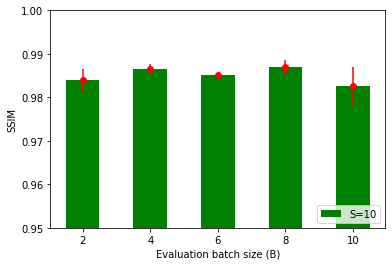

In [67]:
b_res = pd.read_csv('results_batch1.csv')
tri_mean_ssim = b_res.groupby(['S', 'B'])['max_SSIM'].mean().reset_index()
tri_std_ssim = b_res.groupby(['S', 'B'])['max_SSIM'].std().reset_index()
tri_ssim = pd.merge(tri_mean_ssim, tri_std_ssim, on=['S', 'B'], suffixes=('_mean', '_std'))
tri10_ssim = tri_ssim.loc[tri_ssim['S'] == 10]


plt.bar(tri10_ssim['B'], tri10_ssim['max_SSIM_mean'], width=1, label='S=10', color='green')
plt.errorbar(tri10_ssim['B'], tri10_ssim['max_SSIM_mean'], yerr=tri10_ssim['max_SSIM_std'], color='red', fmt='o')
plt.legend(loc='lower right')
plt.ylim(0.95, 1)
plt.xlabel("Evaluation batch size (B)")
plt.ylabel("SSIM")
plt.show()

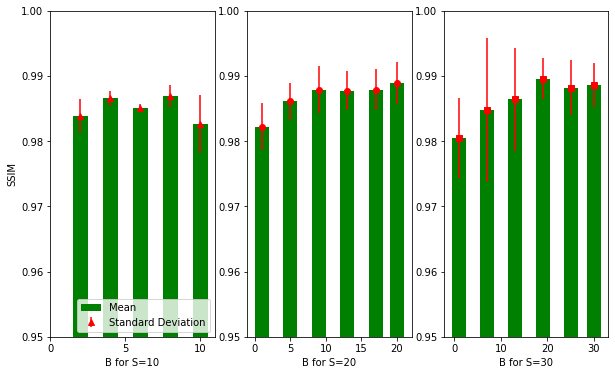

In [94]:
b_res = pd.read_csv('results_batches3.csv')
tri_mean = b_res.groupby(['S', 'B'])['max_SSIM'].mean().reset_index()
tri_std = b_res.groupby(['S', 'B'])['max_SSIM'].std().reset_index()
tri = pd.merge(tri_mean, tri_std, on=['S', 'B'], suffixes=('_mean', '_std'))
tri20 = tri.loc[tri['S'] == 20]
tri30 = tri.loc[tri['S'] == 30]

fig = plt.figure(figsize=(10, 6)) 
plt.subplot(1,3,1), plt.bar(tri10_ssim['B'], tri10_ssim['max_SSIM_mean'], width=1, label='Mean', color='green'), 
plt.errorbar(tri10_ssim['B'], tri10_ssim['max_SSIM_mean'], yerr=tri10_ssim['max_SSIM_std'], color='red', label='Standard Deviation', fmt='^')
plt.legend(loc='lower right')
plt.ylim(0.95, 1)
plt.xticks([0, 5, 10])
plt.xlabel("B for S=10")
plt.ylabel("SSIM")
plt.subplot(1,3,2), plt.bar(tri20['B'], tri20['max_SSIM_mean'], width=2, color='green'), 
plt.errorbar(tri20['B'], tri20['max_SSIM_mean'], yerr=tri20['max_SSIM_std'], color='red', fmt='o')
plt.ylim(0.95, 1)
plt.xlabel("B for S=20")
plt.subplot(1,3,3), plt.bar(tri30['B'], tri30['max_SSIM_mean'], width=3, color='green'), 
plt.errorbar(tri30['B'], tri30['max_SSIM_mean'], yerr=tri30['max_SSIM_std'], color='red', fmt='s')
plt.ylim(0.95, 1)
plt.xticks([0, 10, 20, 30])
plt.xlabel("B for S=30")
plt.show()

### Time

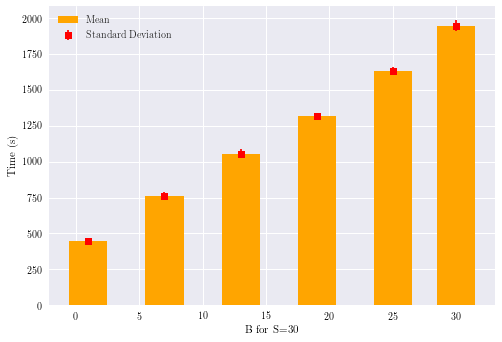

In [14]:
b_res = pd.read_csv('results/results_batches3.csv')
tri_mean = b_res.groupby(['S', 'B'])['Time'].mean().reset_index()
tri_std = b_res.groupby(['S', 'B'])['Time'].std().reset_index()
tri = pd.merge(tri_mean, tri_std, on=['S', 'B'], suffixes=('_mean', '_std'))
tri30 = tri.loc[tri['S'] == 30]

plt.bar(tri30['B'], tri30['Time_mean'], width=3, label='Mean', color='orange')
plt.errorbar(tri30['B'], tri30['Time_mean'], yerr=tri30['Time_std'], color='red', label='Standard Deviation', fmt='s')
plt.ylabel("Time (s)")
plt.xlabel("B for S=30")
plt.legend(loc='upper left')
plt.show()

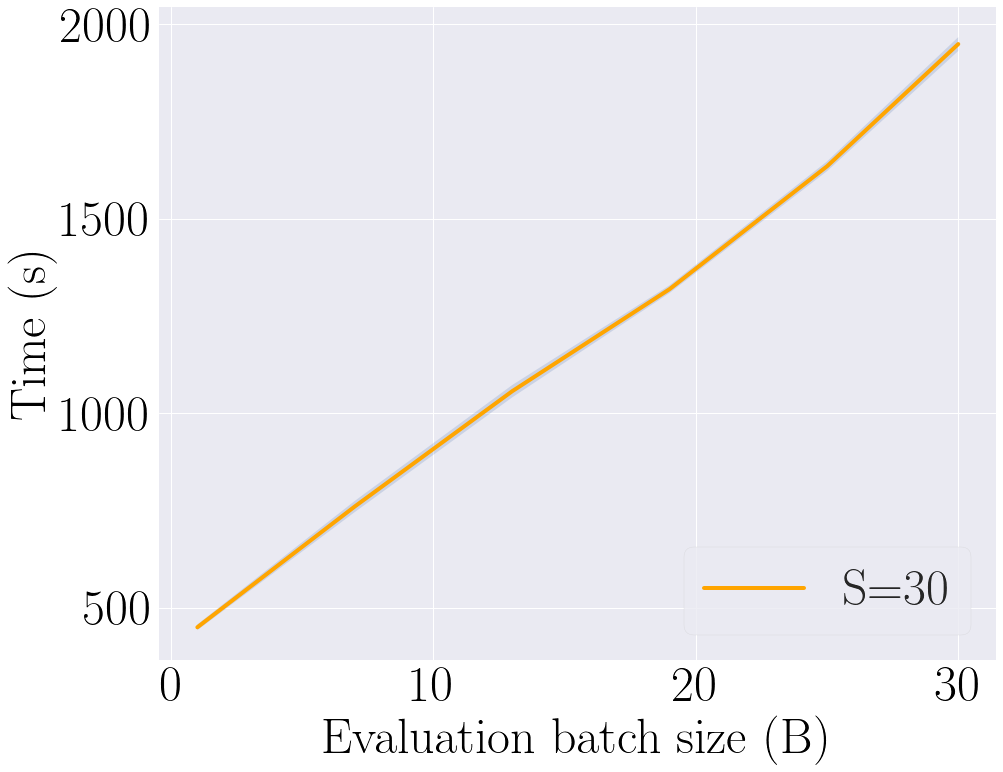

In [13]:
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_xlabel("Evaluation batch size (B)", fontsize=fs)
ax1.set_ylabel("Time (s)", fontsize=fs)
ax1.tick_params(axis='x',labelsize=fs)
ax1.tick_params(axis='y',labelsize=fs)
ax1.plot(tri30['B'],tri30['Time_mean'],linewidth=4,label='S=30', color='orange')
ax1.legend(loc='lower right', fontsize=fs, frameon=True)
l1 = ( tri30['Time_mean']-tri30['Time_std']/2)
l2 = (tri30['Time_mean']+tri30['Time_std']/2)
ax1.fill_between(tri30['B'], l1, l2,alpha=0.2)
plt.show()

### Angles distribution

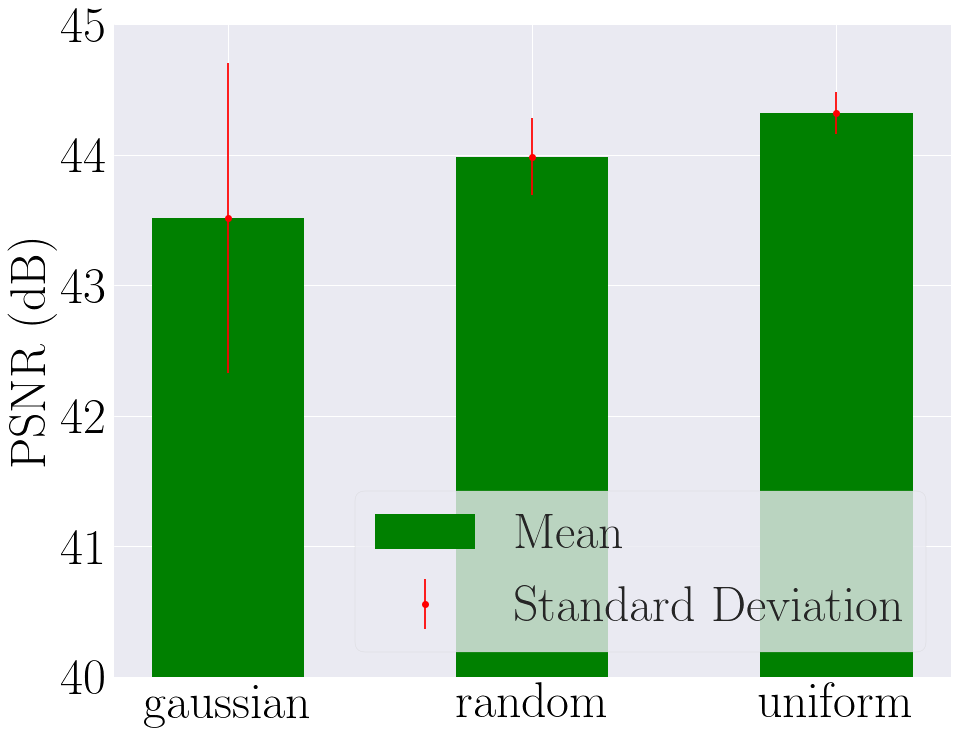

In [54]:
theta_res = pd.read_csv('results/angles_results.csv')
# avoir b_res que pour NUM_ANGLES = 30
theta_res = theta_res.loc[theta_res['NUM_ANGLES'] == 30]

tri_mean = theta_res.groupby(['distribution'])['max_PSNR'].mean().reset_index()
tri_std = theta_res.groupby(['distribution'])['max_PSNR'].std().reset_index()
tri = pd.merge(tri_mean, tri_std, on=['distribution'], suffixes=('_mean', '_std'))

fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_ylabel("PSNR (dB)", fontsize=fs)
ax1.tick_params(axis='x',labelsize=fs)
ax1.tick_params(axis='y',labelsize=fs)

ax1.bar(tri['distribution'], tri['max_PSNR_mean'], label='Mean', color='green', width=0.5)
ax1.set_ylim(40, 45)
ax1.errorbar(tri['distribution'], tri['max_PSNR_mean'], yerr=tri['max_PSNR_std'], fmt='o', color='red', label='Standard Deviation')
ax1.legend(loc='lower right', fontsize=fs, frameon=True)
plt.show()


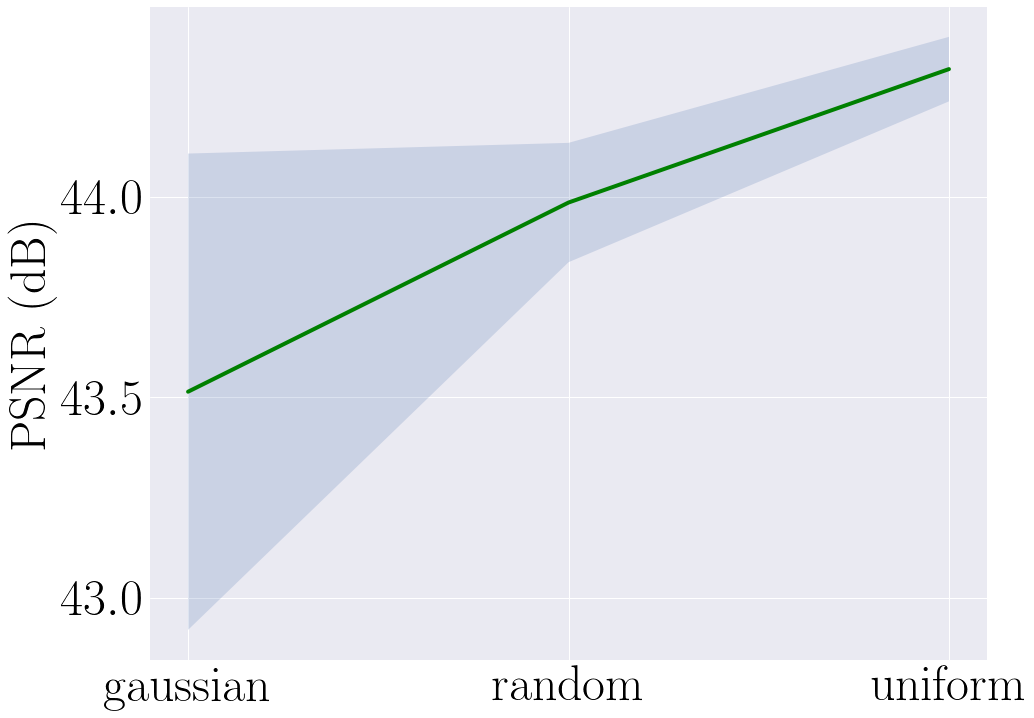

In [24]:
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_ylabel("PSNR (dB)", fontsize=fs)
ax1.tick_params(axis='x',labelsize=fs)
ax1.tick_params(axis='y',labelsize=fs)
ax1.plot(tri['distribution'],tri['max_PSNR_mean'],linewidth=4, color='green')
l1 = ( tri['max_PSNR_mean']-tri['max_PSNR_std']/2)
l2 = (tri['max_PSNR_mean']+tri['max_PSNR_std']/2)
ax1.fill_between(tri['distribution'], l1, l2,alpha=0.2)
plt.show()

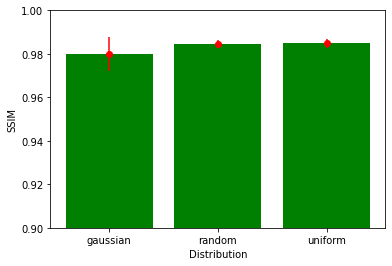

In [98]:
theta_res = pd.read_csv('results/angles_results.csv')
# avoir b_res que pour NUM_ANGLES = 30
theta_res = theta_res.loc[theta_res['NUM_ANGLES'] == 30]

tri_mean = theta_res.groupby(['distribution'])['max_SSIM'].mean().reset_index()
tri_std = theta_res.groupby(['distribution'])['max_SSIM'].std().reset_index()
tri = pd.merge(tri_mean, tri_std, on=['distribution'], suffixes=('_mean', '_std'))


plt.bar(tri['distribution'], tri['max_SSIM_mean'], color='green')
plt.ylim(0.9, 1)
plt.errorbar(tri['distribution'], tri['max_SSIM_mean'], yerr=tri['max_SSIM_std'], fmt='o', color='red')
plt.xlabel("Distribution")
plt.ylabel("SSIM")
plt.show()

## Number of angles 

### PSNR

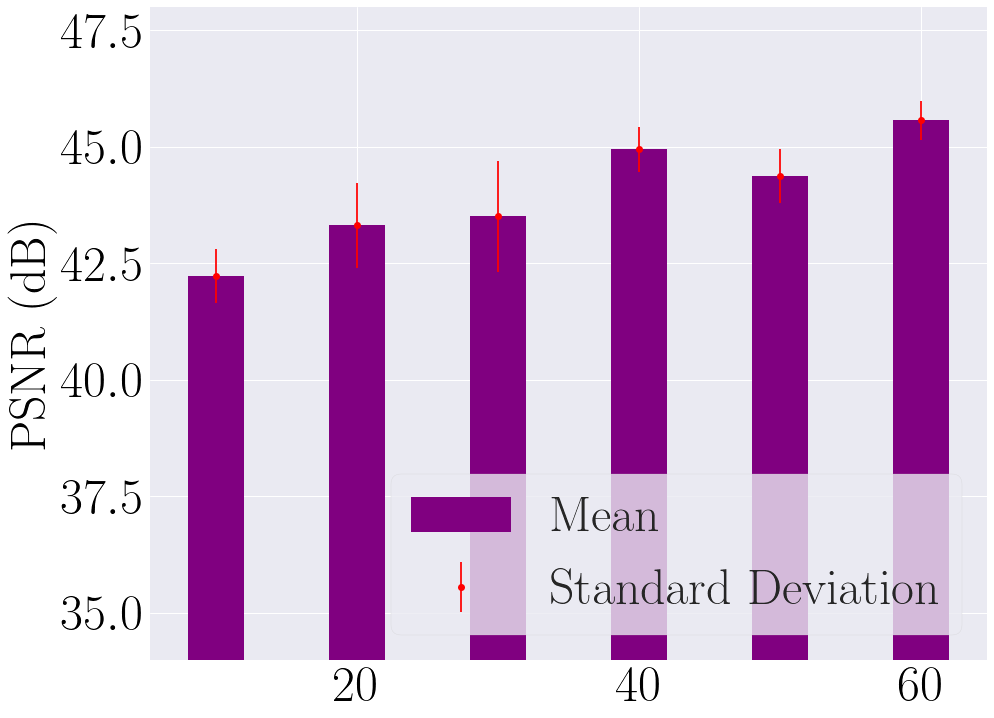

In [51]:
theta_res = pd.read_csv('results/angles_results.csv')
# avoir b_res que pour NUM_ANGLES = 30
theta_res = theta_res.loc[theta_res['distribution'] == 'gaussian']

tri_mean = theta_res.groupby(['NUM_ANGLES'])['max_PSNR'].mean().reset_index()
tri_std = theta_res.groupby(['NUM_ANGLES'])['max_PSNR'].std().reset_index()
tri = pd.merge(tri_mean, tri_std, on=['NUM_ANGLES'], suffixes=('_mean', '_std'))

fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_ylabel("PSNR (dB)", fontsize=fs)
ax1.tick_params(axis='x',labelsize=fs)
ax1.tick_params(axis='y',labelsize=fs)

plt.bar(tri['NUM_ANGLES'], tri['max_PSNR_mean'], width=4, color='purple', label='Mean')
plt.ylim(34, 48)
plt.errorbar(tri['NUM_ANGLES'], tri['max_PSNR_mean'], yerr=tri['max_PSNR_std'], fmt='o', color='red', label='Standard Deviation')
plt.ylabel("PSNR (dB)")
plt.legend(loc='lower right', fontsize=fs, frameon=True)
plt.show()

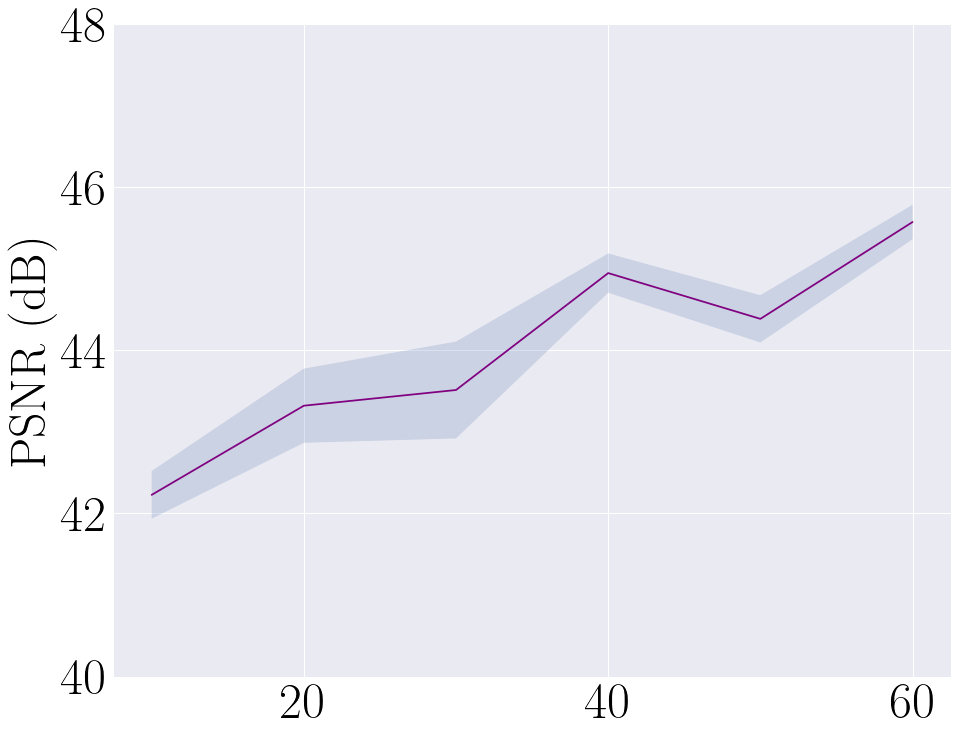

In [52]:
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_ylabel("PSNR (dB)", fontsize=fs)
ax1.tick_params(axis='x',labelsize=fs)
ax1.tick_params(axis='y',labelsize=fs)

plt.plot(tri['NUM_ANGLES'], tri['max_PSNR_mean'], color='purple')
plt.ylim(40, 48)
l1 = ( tri['max_PSNR_mean']-tri['max_PSNR_std']/2)
l2 = (tri['max_PSNR_mean']+tri['max_PSNR_std']/2)
ax1.fill_between(tri['NUM_ANGLES'], l1, l2,alpha=0.2)
plt.ylabel("PSNR (dB)")
plt.show()

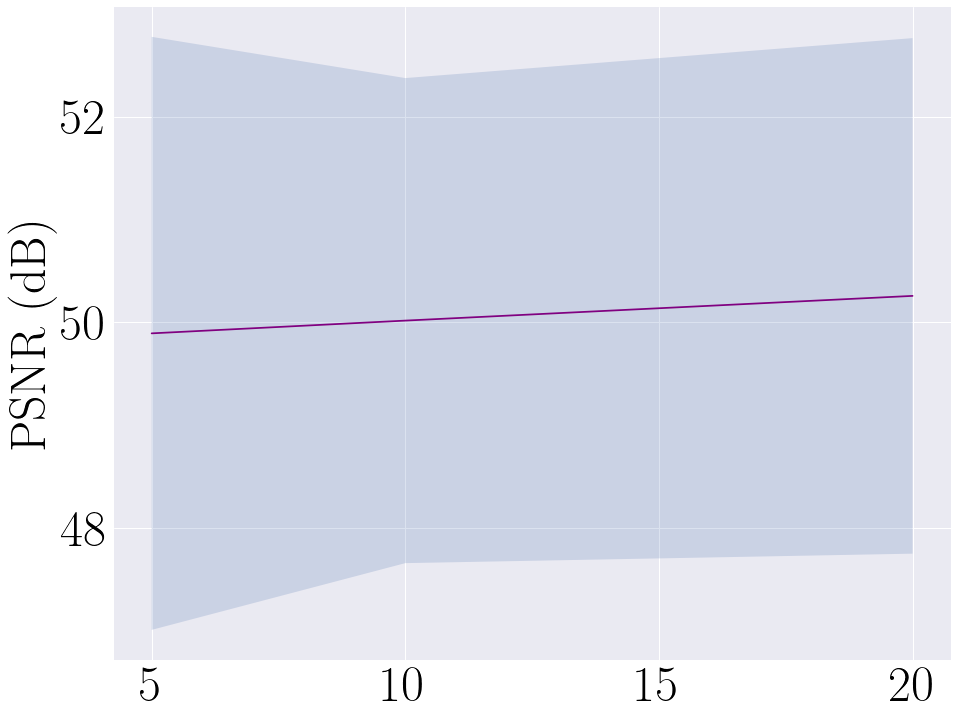

In [42]:
theta_res = pd.read_csv('results/results_51020angles.csv')
# avoir b_res que pour NUM_ANGLES = 30
theta_res = theta_res.loc[theta_res['distribution'] == 'gaussian']

tri_mean = theta_res.groupby(['NUM_ANGLES'])['max_PSNR'].mean().reset_index()
tri_std = theta_res.groupby(['NUM_ANGLES'])['max_PSNR'].std().reset_index()
tri = pd.merge(tri_mean, tri_std, on=['NUM_ANGLES'], suffixes=('_mean', '_std'))

fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_ylabel("PSNR (dB)", fontsize=fs)
ax1.tick_params(axis='x',labelsize=fs)
ax1.tick_params(axis='y',labelsize=fs)

plt.plot(tri['NUM_ANGLES'], tri['max_PSNR_mean'], color='purple')
l1 = ( tri['max_PSNR_mean']-tri['max_PSNR_std']/2)
l2 = (tri['max_PSNR_mean']+tri['max_PSNR_std']/2)
ax1.fill_between(tri['NUM_ANGLES'], l1, l2,alpha=0.2)
plt.ylabel("PSNR (dB)")
plt.show()

In [44]:
print(theta_res.loc[theta_res['NUM_ANGLES'] == 5]['max_SSIM'].mean())
print(theta_res.loc[theta_res['NUM_ANGLES'] == 10]['max_SSIM'].mean())
print(theta_res.loc[theta_res['NUM_ANGLES'] == 20]['max_SSIM'].mean())

0.9919625806808472
0.9918494760990143
0.9912943935394287


### SSIM

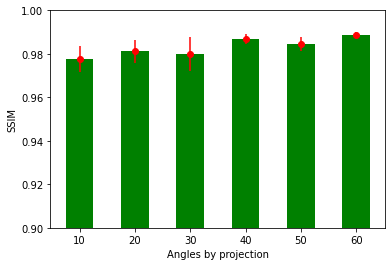

In [42]:
theta_res = pd.read_csv('angles_results.csv')
# avoir b_res que pour NUM_ANGLES = 30
theta_res = theta_res.loc[theta_res['distribution'] == 'gaussian']

tri_mean = theta_res.groupby(['NUM_ANGLES'])['max_SSIM'].mean().reset_index()
tri_std = theta_res.groupby(['NUM_ANGLES'])['max_SSIM'].std().reset_index()
tri = pd.merge(tri_mean, tri_std, on=['NUM_ANGLES'], suffixes=('_mean', '_std'))

plt.bar(tri['NUM_ANGLES'], tri['max_SSIM_mean'], color='green',  width=5)
plt.ylim(0.9, 1)
plt.errorbar(tri['NUM_ANGLES'], tri['max_SSIM_mean'], yerr=tri['max_SSIM_std'], fmt='o', color='red')
plt.xlabel("Angles by projection")
plt.ylabel("SSIM")
plt.show()

In [4]:
final_results = pd.read_csv('results_30angles.csv')
print(final_results['max_PSNR'].mean())
print(final_results['max_SSIM'].mean())

43.91576881408692
0.9783768546581268


In [ ]:


b_res = pd.read_csv('results_batch1.csv')
tri_mean = b_res.groupby(['S', 'B'])['max_PSNR'].mean().reset_index()
tri_std = b_res.groupby(['S', 'B'])['max_PSNR'].std().reset_index()
tri = pd.merge(tri_mean, tri_std, on=['S', 'B'], suffixes=('_mean', '_std'))
tri10 = tri.loc[tri['S'] == 10]

b_res = pd.read_csv('results_batches3.csv')
tri_mean = b_res.groupby(['S', 'B'])['max_PSNR'].mean().reset_index()
tri_std = b_res.groupby(['S', 'B'])['max_PSNR'].std().reset_index()
tri = pd.merge(tri_mean, tri_std, on=['S', 'B'], suffixes=('_mean', '_std'))
tri20 = tri.loc[tri['S'] == 20]
tri30 = tri.loc[tri['S'] == 30]

fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

#ax1.bar(tri10['B'], tri10['max_PSNR_mean'], width=1, label='S=10')
#ax1.errorbar(tri10['B'], tri10['max_PSNR_mean'], yerr=tri10['max_PSNR_std'], color='red', fmt='o')
ax1.set_ylim(40, 48)
ax1.set_xlabel("Evaluation batch size (B)", fontsize=fs)
ax1.set_ylabel("PSNR (dB)", fontsize=fs)
ax1.tick_params(axis='x',labelsize=fs)
ax1.tick_params(axis='y',labelsize=fs)
ax1.plot(tri10['B'],tri10['max_PSNR_mean'],linewidth=4,label='S=10')
ax1.legend(loc='lower right', fontsize=fs, frameon=True)
l1 = ( tri10['max_PSNR_mean']-tri10['max_PSNR_std']/2)
l2 = (tri10['max_PSNR_mean']+tri10['max_PSNR_std']/2)
ax1.fill_between(tri10['B'], l1, l2,alpha=0.2)
#ax1.ylim(40, 48)
#ax1.xlabel("Evaluation batch size (B)", fontsize=fs)
#ax1.ylabel("PSNR (dB)", fontsize=fs)

#ax2.bar(tri20['B'], tri20['max_PSNR_mean'], width=2, label='S=20')
ax2.plot(tri20['B'],tri20['max_PSNR_mean'],linewidth=4,label='S=20', color='red')
ax2.legend(loc='lower right', fontsize=fs, frameon=True)
l1 = ( tri20['max_PSNR_mean']-tri20['max_PSNR_std']/2)
l2 = (tri20['max_PSNR_mean']+tri20['max_PSNR_std']/2)
ax2.fill_between(tri20['B'], l1, l2,alpha=0.2, color='red')
ax2.tick_params(axis='x',labelsize=fs)
ax2.tick_params(axis='y',labelsize=fs)
ax2.get_yaxis().set_visible(False)
ax2.set_ylim(40, 48)

ax3.plot(tri30['B'],tri30['max_PSNR_mean'],linewidth=4,label='S=30', color='green')
ax3.legend(loc='lower right', fontsize=fs, frameon=True)
l1 = ( tri30['max_PSNR_mean']-tri30['max_PSNR_std']/2)
l2 = (tri30['max_PSNR_mean']+tri30['max_PSNR_std']/2)
ax3.fill_between(tri30['B'], l1, l2,alpha=0.2, color='green')
ax3.tick_params(axis='x',labelsize=fs)
ax3.get_yaxis().set_visible(False)
ax3.set_ylim(40, 48)

plt.show()